# Pulsar Star Prediction

We use a few machine learning algorithms to label pulsar candidates. 
The data set can be found here:
https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star 

In [1]:
# !pip install graphviz # in case you haven't installed graphviz
# import dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz

%matplotlib inline

In [2]:
data = pd.read_csv('pulsar_stars.csv')

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
# Determine the amount of missing data
data.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

There is no missing data in this data set.

We will now determine the amount of data points in each class.

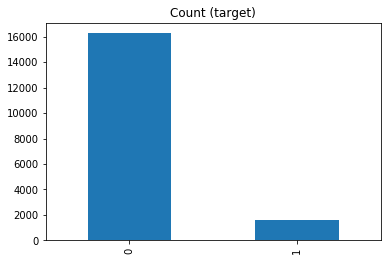

In [5]:
target_count = data.target_class.value_counts()
target_count.plot(kind='bar', title='Count (target)');

In [6]:
# Class count
count_class_0, count_class_1 = data.target_class.value_counts()
print('count_class_0: ' + str(count_class_0))
print('count_class_1: ' + str(count_class_1))

# Divide by class
data_class_0 = data[data['target_class'] == 0]
data_class_1 = data[data['target_class'] == 1]

count_class_0: 16259
count_class_1: 1639


Since we are dealing with an imbalanced data set, we need to obtain a more balanced data set. We will use under-sampling and over-sampling.

## Random under-sampling

Random under-sampling:
1    1639
0    1639
Name: target_class, dtype: int64


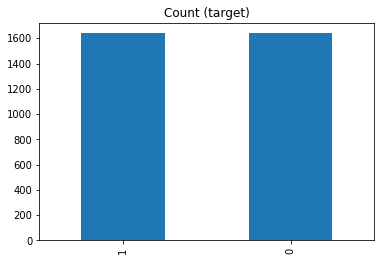

In [7]:
data_class_0_under = data_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Random under-sampling:')
print(data_test_under.target_class.value_counts())

data_test_under.target_class.value_counts().plot(kind='bar', title='Count (target)');

In [8]:
data2 = data_test_under
# split data into train and test sets
y = data2['target_class']
X = data2.drop('target_class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will now try to make predictions on the test set using Logistic Regression, Naive Bayes, Decision Tree, Random Forest and XGBoost.

### Logistic Regression

In [9]:
model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9329268292682927

Confusion Matrix:
[[490  12]
 [ 54 428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       502
           1       0.97      0.89      0.93       482

   micro avg       0.93      0.93      0.93       984
   macro avg       0.94      0.93      0.93       984
weighted avg       0.94      0.93      0.93       984



### Naive Bayes

In [10]:
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.8902439024390244

Confusion Matrix:
[[473  29]
 [ 79 403]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       502
           1       0.93      0.84      0.88       482

   micro avg       0.89      0.89      0.89       984
   macro avg       0.89      0.89      0.89       984
weighted avg       0.89      0.89      0.89       984



### Decision Tree

In [11]:
model = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train) 
#dot_graph = tree.export_graphviz(model)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9085365853658537

Confusion Matrix:
[[461  41]
 [ 49 433]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       502
           1       0.91      0.90      0.91       482

   micro avg       0.91      0.91      0.91       984
   macro avg       0.91      0.91      0.91       984
weighted avg       0.91      0.91      0.91       984



### Random Forest

In [12]:
model = RandomForestClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9390243902439024

Confusion Matrix:
[[492  10]
 [ 50 432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       502
           1       0.98      0.90      0.94       482

   micro avg       0.94      0.94      0.94       984
   macro avg       0.94      0.94      0.94       984
weighted avg       0.94      0.94      0.94       984



### XGBoost

In [13]:
# XGBoost
model = XGBClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9339430894308943

Confusion Matrix:
[[485  17]
 [ 48 434]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       502
           1       0.96      0.90      0.93       482

   micro avg       0.93      0.93      0.93       984
   macro avg       0.94      0.93      0.93       984
weighted avg       0.94      0.93      0.93       984



## Random Over sampling

Random over-sampling:
1    16259
0    16259
Name: target_class, dtype: int64


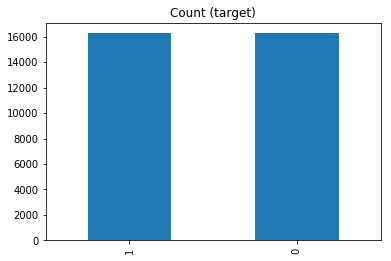

In [14]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_test_over.target_class.value_counts())

data_test_over.target_class.value_counts().plot(kind='bar', title='Count (target)');

In [15]:
data2 = data_test_over
# split data into train and test sets
y = data2['target_class']
X = data2.drop('target_class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will now try to make predictions on the test set using Logistic Regression, Naive Bayes, Decision Tree, Random Forest and XGBoost.

### Logistic Regression

In [16]:
model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9402419024190242

Confusion Matrix:
[[4823  140]
 [ 443 4350]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4963
           1       0.97      0.91      0.94      4793

   micro avg       0.94      0.94      0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756



### Naive Bayes

In [17]:
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9029315293152932

Confusion Matrix:
[[4676  287]
 [ 660 4133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4963
           1       0.94      0.86      0.90      4793

   micro avg       0.90      0.90      0.90      9756
   macro avg       0.91      0.90      0.90      9756
weighted avg       0.91      0.90      0.90      9756



### Decision Tree

In [18]:
model = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train) 
#dot_graph = tree.export_graphviz(model)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9869823698236982

Confusion Matrix:
[[4836  127]
 [   0 4793]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4963
           1       0.97      1.00      0.99      4793

   micro avg       0.99      0.99      0.99      9756
   macro avg       0.99      0.99      0.99      9756
weighted avg       0.99      0.99      0.99      9756



### Random Forest

In [19]:
model = RandomForestClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.995489954899549

Confusion Matrix:
[[4919   44]
 [   0 4793]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4963
           1       0.99      1.00      1.00      4793

   micro avg       1.00      1.00      1.00      9756
   macro avg       1.00      1.00      1.00      9756
weighted avg       1.00      1.00      1.00      9756



### XGBoost

In [20]:
model = XGBClassifier(random_state=42, n_estimators=1000).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9919024190241903

Confusion Matrix:
[[4892   71]
 [   8 4785]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4963
           1       0.99      1.00      0.99      4793

   micro avg       0.99      0.99      0.99      9756
   macro avg       0.99      0.99      0.99      9756
weighted avg       0.99      0.99      0.99      9756

